# Railway stations in Europe: an exploration.

In anticipation of me derping around Europe on trains:

In [2]:
import numpy as np 
import pandas as pd 
import unicodedata
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dynamicwebpaige/nanowrimo-2021/main/data/stations.csv', header=0, delimiter=";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (19,35,45,47,60) have mixed types.Specify dtype option on import or set low_memory=False.



In [5]:
df.head()

,id,name,slug,uic,uic8_sncf,latitude,longitude,parent_station_id,country,time_zone,is_city,is_main_station,is_airport,is_suggestable,country_hint,main_station_hint,sncf_id,sncf_tvs_id,sncf_is_enabled,idtgv_id,idtgv_is_enabled,db_id,db_is_enabled,busbud_id,busbud_is_enabled,distribusion_id,distribusion_is_enabled,flixbus_id,flixbus_is_enabled,cff_id,cff_is_enabled,leoexpress_id,leoexpress_is_enabled,obb_id,obb_is_enabled,ouigo_id,ouigo_is_enabled,trenitalia_id,trenitalia_is_enabled,trenitalia_rtvt_id,ntv_rtiv_id,ntv_id,ntv_is_enabled,hkx_id,hkx_is_enabled,renfe_id,renfe_is_enabled,atoc_id,atoc_is_enabled,benerail_id,benerail_is_enabled,westbahn_id,westbahn_is_enabled,sncf_self_service_machine,same_as,info:de,info:en,info:es,info:fr,info:it,info:nb,info:nl,info:cs,info:da,info:hu,info:ja,info:ko,info:pl,info:pt,info:ru,info:sv,info:tr,info:zh,normalised_code,iata_airport_code
0,1,Château-Arnoux—St-Auban,chateau-arnoux-st-auban,NaN,NaN,44.081790,6.001625,NaN,FR,Europe/Paris,t,f,f,f,f,f,FRAAA,NaN,t,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,NaN,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,urn:trainline:public:nloc:csv1,NaN
1,2,Château-Arnoux—St-Auban,chateau-arnoux-st-auban,8775123.0,87751230.0,44.061565,5.997373,1.0,FR,Europe/Paris,f,t,f,t,f,f,FRCAA,SAU,t,NaN,f,8700156.0,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,8700156.0,f,NaN,f,NaN,f,NaN,NaN,NaN,f,NaN,f,8700334,f,NaN,f,FRCAA,f,NaN,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,urn:trainline:public:nloc:csv2,NaN
2,3,Château-Arnoux Mairie,chateau-arnoux-mairie,8775122.0,87751222.0,44.063863,6.011248,1.0,FR,Europe/Paris,f,f,f,t,f,f,FRHXG,NaN,t,NaN,f,8704959.0,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,8704959.0,f,NaN,f,NaN,f,NaN,NaN,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,urn:trainline:public:nloc:csv3,NaN
3,4,Digne-les-Bains,digne-les-bains,NaN,NaN,44.350000,6.350000,NaN,FR,Europe/Paris,t,f,f,f,f,f,FRAAB,NaN,t,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,NaN,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ディーニュ＝レ＝バン,디뉴레뱅,NaN,NaN,Динь-ле-Бен,NaN,NaN,迪涅萊班,urn:trainline:public:nloc:csv4,NaN
4,6,Digne-les-Bains,digne-les-bains,8775149.0,87751495.0,44.088710,6.222982,4.0,FR,Europe/Paris,f,t,f,t,f,f,FRXDI,NaN,t,NaN,f,8703212.0,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,NaN,NaN,f,NaN,f,8700335,f,NaN,f,NaN,f,NaN,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ディーニュ＝レ＝バン,디뉴레뱅,NaN,NaN,Динь-ле-Бен,NaN,NaN,迪涅萊班,urn:trainline:public:nloc:csv6,NaN


In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column': df.columns,
                                 'percent': percent_missing})
missing_value_df.sort_values('percent', inplace=True)
missing_value_df.reset_index(drop=True, inplace=True)
missing_value_df = missing_value_df[missing_value_df['percent']>0]

fig = px.bar(
    missing_value_df, 
    x='percent', 
    y="column", 
    orientation='h', 
    title='Columns with Missing Values', 
    height=800, 
    width=600
)
fig.show()

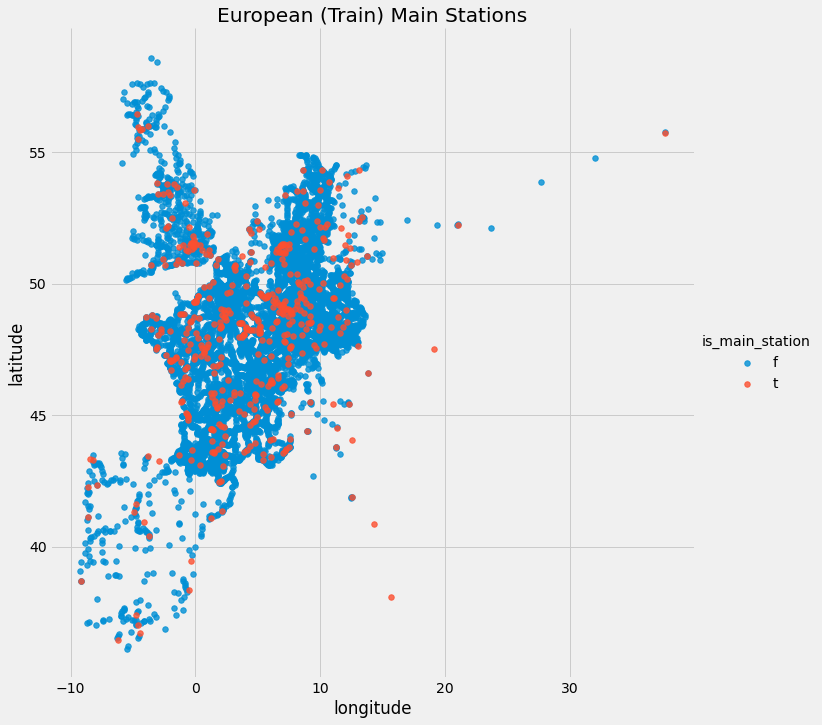

In [7]:
g = sns.lmplot(x="longitude", y="latitude", data=df,
           fit_reg=False, scatter_kws={"s": 30}, hue='is_main_station', height=10)
plt.title('European (Train) Main Stations')
plt.show()

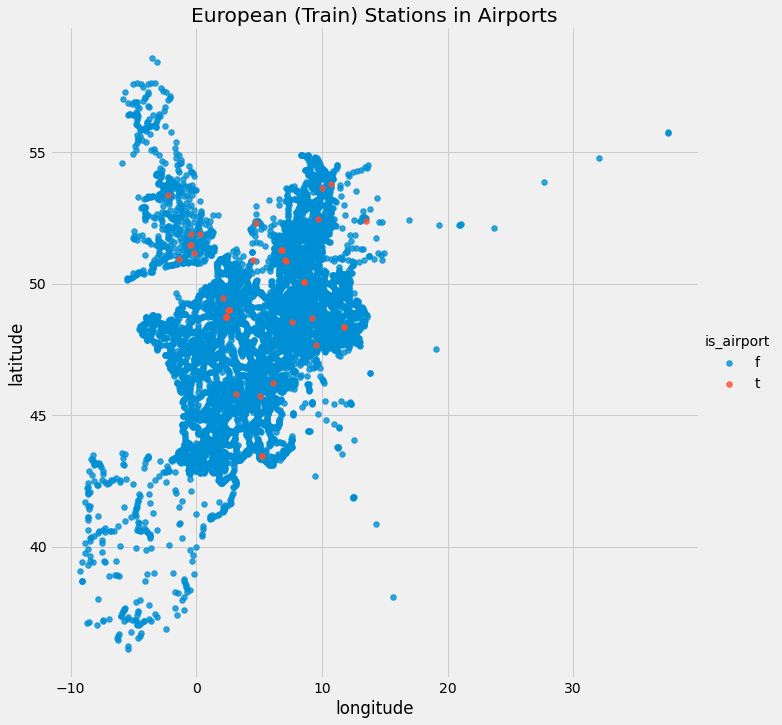

In [8]:
g = sns.lmplot(x="longitude", y="latitude", data=df,
           fit_reg=False, scatter_kws={"s": 30}, hue='is_airport', height=10)
plt.title('European (Train) Stations in Airports')
plt.show()

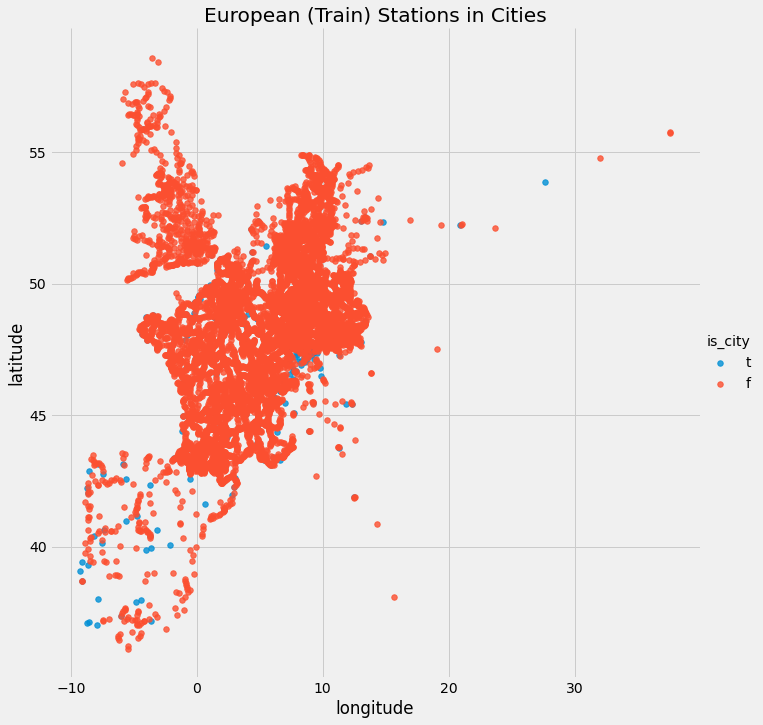

In [9]:
g = sns.lmplot(x="longitude", y="latitude", data=df,
           fit_reg=False, scatter_kws={"s": 30}, hue='is_city', height=10)
plt.title('European (Train) Stations in Cities')
plt.show()

In [22]:
fig_px = px.scatter_mapbox(df, lat="latitude", lon="longitude",
                           hover_name="name",
                           zoom=11, height=800)
fig_px.update_layout(mapbox_style="open-street-map",
                     margin={"r":0,"t":0,"l":0,"b":0})


fig_px.show()

In [18]:
df.columns

Index(['id', 'name', 'slug', 'uic', 'uic8_sncf', 'latitude', 'longitude',
       'parent_station_id', 'country', 'time_zone', 'is_city',
       'is_main_station', 'is_airport', 'is_suggestable', 'country_hint',
       'main_station_hint', 'sncf_id', 'sncf_tvs_id', 'sncf_is_enabled',
       'idtgv_id', 'idtgv_is_enabled', 'db_id', 'db_is_enabled', 'busbud_id',
       'busbud_is_enabled', 'distribusion_id', 'distribusion_is_enabled',
       'flixbus_id', 'flixbus_is_enabled', 'cff_id', 'cff_is_enabled',
       'leoexpress_id', 'leoexpress_is_enabled', 'obb_id', 'obb_is_enabled',
       'ouigo_id', 'ouigo_is_enabled', 'trenitalia_id',
       'trenitalia_is_enabled', 'trenitalia_rtvt_id', 'ntv_rtiv_id', 'ntv_id',
       'ntv_is_enabled', 'hkx_id', 'hkx_is_enabled', 'renfe_id',
       'renfe_is_enabled', 'atoc_id', 'atoc_is_enabled', 'benerail_id',
       'benerail_is_enabled', 'westbahn_id', 'westbahn_is_enabled',
       'sncf_self_service_machine', 'same_as', 'info:de', 'info:en', 'info:e